In [20]:
import numpy as np
from keras.models import Model
from keras.layers import Input, LSTM, Dense, RepeatVector, TimeDistributed

In [21]:
seq_in = np.array([.1, .2 , .3, .4, .5, .6, .7, .8, .9])
print(seq_in)

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


In [22]:
n_in = len(seq_in)
#print(n_in)

samples = 1 # batch_size
features = 1 # n_input
hidden_layer = 100
epochs = 300

seq_in = seq_in.reshape(samples, n_in, features)
print("seq_in=\n", seq_in)

seq_out = seq_in[:, 1:, :]
print("seq_out=\n", seq_out)

n_out = n_in - 1

seq_in=
 [[[0.1]
  [0.2]
  [0.3]
  [0.4]
  [0.5]
  [0.6]
  [0.7]
  [0.8]
  [0.9]]]
seq_out=
 [[[0.2]
  [0.3]
  [0.4]
  [0.5]
  [0.6]
  [0.7]
  [0.8]
  [0.9]]]


In [23]:
# define encoder
visible = Input(shape=(n_in, features))
encoder = LSTM(hidden_layer, activation='relu')(visible)

#define reconstruct decoder
reconstruct_decoder = RepeatVector(n_in)(encoder)
reconstruct_decoder = LSTM(hidden_layer, activation='relu', return_sequences=True)(reconstruct_decoder)
reconstruct_decoder = TimeDistributed(Dense(1))(reconstruct_decoder)

# define prediction decoder
prediction_decoder = RepeatVector(n_out)(encoder)
prediction_decoder = LSTM(hidden_layer, activation='relu', return_sequences=True)(prediction_decoder)
prediction_decoder = TimeDistributed(Dense(1))(prediction_decoder)

# combine together
model = Model(inputs=visible, outputs=[reconstruct_decoder, prediction_decoder])

In [24]:
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
model.fit(seq_in, [seq_in, seq_out], epochs=epochs)

result = model.evaluate(seq_in, [seq_in, seq_out])
print("\nTraining accuracy:", result[1])

Epoch 1/300
1/1 [==============================] - 1s 1s/step - loss: 0.6776 - time_distributed_3_loss: 0.2971 - time_distributed_4_loss: 0.3805 - time_distributed_3_acc: 0.0000e+00 - time_distributed_4_acc: 0.0000e+00
Epoch 2/300
1/1 [==============================] - 0s 20ms/step - loss: 0.6512 - time_distributed_3_loss: 0.2856 - time_distributed_4_loss: 0.3656 - time_distributed_3_acc: 0.0000e+00 - time_distributed_4_acc: 0.0000e+00
Epoch 3/300
1/1 [==============================] - 0s 19ms/step - loss: 0.6211 - time_distributed_3_loss: 0.2718 - time_distributed_4_loss: 0.3493 - time_distributed_3_acc: 0.0000e+00 - time_distributed_4_acc: 0.0000e+00
Epoch 4/300
1/1 [==============================] - 0s 19ms/step - loss: 0.5900 - time_distributed_3_loss: 0.2567 - time_distributed_4_loss: 0.3333 - time_distributed_3_acc: 0.0000e+00 - time_distributed_4_acc: 0.0000e+00
Epoch 5/300
1/1 [==============================] - 0s 22ms/step - loss: 0.5586 - time_distributed_3_loss: 0.2406 - tim

Epoch 38/300
1/1 [==============================] - 0s 23ms/step - loss: 0.0158 - time_distributed_3_loss: 0.0153 - time_distributed_4_loss: 5.6638e-04 - time_distributed_3_acc: 0.0000e+00 - time_distributed_4_acc: 0.0000e+00
Epoch 39/300
1/1 [==============================] - 0s 20ms/step - loss: 0.0132 - time_distributed_3_loss: 0.0123 - time_distributed_4_loss: 9.5799e-04 - time_distributed_3_acc: 0.0000e+00 - time_distributed_4_acc: 0.0000e+00
Epoch 40/300
1/1 [==============================] - 0s 19ms/step - loss: 0.0112 - time_distributed_3_loss: 0.0096 - time_distributed_4_loss: 0.0016 - time_distributed_3_acc: 0.0000e+00 - time_distributed_4_acc: 0.0000e+00
Epoch 41/300
1/1 [==============================] - 0s 20ms/step - loss: 0.0099 - time_distributed_3_loss: 0.0076 - time_distributed_4_loss: 0.0023 - time_distributed_3_acc: 0.0000e+00 - time_distributed_4_acc: 0.0000e+00
Epoch 42/300
1/1 [==============================] - 0s 20ms/step - loss: 0.0090 - time_distributed_3_los

Epoch 75/300
1/1 [==============================] - 0s 20ms/step - loss: 0.0029 - time_distributed_3_loss: 0.0025 - time_distributed_4_loss: 4.5770e-04 - time_distributed_3_acc: 0.0000e+00 - time_distributed_4_acc: 0.0000e+00
Epoch 76/300
1/1 [==============================] - 0s 20ms/step - loss: 0.0029 - time_distributed_3_loss: 0.0024 - time_distributed_4_loss: 4.5335e-04 - time_distributed_3_acc: 0.0000e+00 - time_distributed_4_acc: 0.0000e+00
Epoch 77/300
1/1 [==============================] - 0s 19ms/step - loss: 0.0028 - time_distributed_3_loss: 0.0024 - time_distributed_4_loss: 4.2389e-04 - time_distributed_3_acc: 0.0000e+00 - time_distributed_4_acc: 0.0000e+00
Epoch 78/300
1/1 [==============================] - 0s 21ms/step - loss: 0.0027 - time_distributed_3_loss: 0.0023 - time_distributed_4_loss: 3.8038e-04 - time_distributed_3_acc: 0.0000e+00 - time_distributed_4_acc: 0.0000e+00
Epoch 79/300
1/1 [==============================] - 0s 21ms/step - loss: 0.0026 - time_distribut

Epoch 111/300
1/1 [==============================] - 0s 19ms/step - loss: 7.7222e-04 - time_distributed_3_loss: 5.4035e-04 - time_distributed_4_loss: 2.3187e-04 - time_distributed_3_acc: 0.0000e+00 - time_distributed_4_acc: 0.0000e+00
Epoch 112/300
1/1 [==============================] - 0s 21ms/step - loss: 7.4496e-04 - time_distributed_3_loss: 5.1446e-04 - time_distributed_4_loss: 2.3050e-04 - time_distributed_3_acc: 0.0000e+00 - time_distributed_4_acc: 0.0000e+00
Epoch 113/300
1/1 [==============================] - 0s 20ms/step - loss: 7.1887e-04 - time_distributed_3_loss: 4.8889e-04 - time_distributed_4_loss: 2.2998e-04 - time_distributed_3_acc: 0.0000e+00 - time_distributed_4_acc: 0.0000e+00
Epoch 114/300
1/1 [==============================] - 0s 19ms/step - loss: 6.9392e-04 - time_distributed_3_loss: 4.6376e-04 - time_distributed_4_loss: 2.3016e-04 - time_distributed_3_acc: 0.0000e+00 - time_distributed_4_acc: 0.0000e+00
Epoch 115/300
1/1 [==============================] - 0s 19ms

Epoch 146/300
1/1 [==============================] - 0s 21ms/step - loss: 2.9645e-04 - time_distributed_3_loss: 8.4733e-05 - time_distributed_4_loss: 2.1171e-04 - time_distributed_3_acc: 0.0000e+00 - time_distributed_4_acc: 0.0000e+00
Epoch 147/300
1/1 [==============================] - 0s 22ms/step - loss: 2.9205e-04 - time_distributed_3_loss: 8.0984e-05 - time_distributed_4_loss: 2.1107e-04 - time_distributed_3_acc: 0.0000e+00 - time_distributed_4_acc: 0.0000e+00
Epoch 148/300
1/1 [==============================] - 0s 19ms/step - loss: 2.8790e-04 - time_distributed_3_loss: 7.7451e-05 - time_distributed_4_loss: 2.1045e-04 - time_distributed_3_acc: 0.0000e+00 - time_distributed_4_acc: 0.0000e+00
Epoch 149/300
1/1 [==============================] - 0s 20ms/step - loss: 2.8403e-04 - time_distributed_3_loss: 7.4137e-05 - time_distributed_4_loss: 2.0989e-04 - time_distributed_3_acc: 0.0000e+00 - time_distributed_4_acc: 0.0000e+00
Epoch 150/300
1/1 [==============================] - 0s 20ms

Epoch 181/300
1/1 [==============================] - 0s 19ms/step - loss: 2.2949e-04 - time_distributed_3_loss: 3.5647e-05 - time_distributed_4_loss: 1.9385e-04 - time_distributed_3_acc: 0.0000e+00 - time_distributed_4_acc: 0.0000e+00
Epoch 182/300
1/1 [==============================] - 0s 21ms/step - loss: 2.2872e-04 - time_distributed_3_loss: 3.5383e-05 - time_distributed_4_loss: 1.9333e-04 - time_distributed_3_acc: 0.0000e+00 - time_distributed_4_acc: 0.0000e+00
Epoch 183/300
1/1 [==============================] - 0s 20ms/step - loss: 2.2795e-04 - time_distributed_3_loss: 3.5138e-05 - time_distributed_4_loss: 1.9282e-04 - time_distributed_3_acc: 0.0000e+00 - time_distributed_4_acc: 0.0000e+00
Epoch 184/300
1/1 [==============================] - 0s 19ms/step - loss: 2.2720e-04 - time_distributed_3_loss: 3.4909e-05 - time_distributed_4_loss: 1.9229e-04 - time_distributed_3_acc: 0.0000e+00 - time_distributed_4_acc: 0.0000e+00
Epoch 185/300
1/1 [==============================] - 0s 20ms

Epoch 216/300
1/1 [==============================] - 0s 20ms/step - loss: 2.0691e-04 - time_distributed_3_loss: 3.1206e-05 - time_distributed_4_loss: 1.7570e-04 - time_distributed_3_acc: 0.0000e+00 - time_distributed_4_acc: 0.0000e+00
Epoch 217/300
1/1 [==============================] - 0s 22ms/step - loss: 2.0629e-04 - time_distributed_3_loss: 3.1126e-05 - time_distributed_4_loss: 1.7516e-04 - time_distributed_3_acc: 0.0000e+00 - time_distributed_4_acc: 0.0000e+00
Epoch 218/300
1/1 [==============================] - 0s 19ms/step - loss: 2.0566e-04 - time_distributed_3_loss: 3.1046e-05 - time_distributed_4_loss: 1.7461e-04 - time_distributed_3_acc: 0.0000e+00 - time_distributed_4_acc: 0.0000e+00
Epoch 219/300
1/1 [==============================] - 0s 19ms/step - loss: 2.0505e-04 - time_distributed_3_loss: 3.0967e-05 - time_distributed_4_loss: 1.7409e-04 - time_distributed_3_acc: 0.0000e+00 - time_distributed_4_acc: 0.0000e+00
Epoch 220/300
1/1 [==============================] - 0s 19ms

Epoch 251/300
1/1 [==============================] - 0s 22ms/step - loss: 1.8451e-04 - time_distributed_3_loss: 2.8469e-05 - time_distributed_4_loss: 1.5604e-04 - time_distributed_3_acc: 0.0000e+00 - time_distributed_4_acc: 0.0000e+00
Epoch 252/300
1/1 [==============================] - 0s 20ms/step - loss: 1.8431e-04 - time_distributed_3_loss: 2.8394e-05 - time_distributed_4_loss: 1.5591e-04 - time_distributed_3_acc: 0.0000e+00 - time_distributed_4_acc: 0.0000e+00
Epoch 253/300
1/1 [==============================] - 0s 19ms/step - loss: 1.8297e-04 - time_distributed_3_loss: 2.8324e-05 - time_distributed_4_loss: 1.5464e-04 - time_distributed_3_acc: 0.0000e+00 - time_distributed_4_acc: 0.0000e+00
Epoch 254/300
1/1 [==============================] - 0s 19ms/step - loss: 1.8219e-04 - time_distributed_3_loss: 2.8257e-05 - time_distributed_4_loss: 1.5393e-04 - time_distributed_3_acc: 0.0000e+00 - time_distributed_4_acc: 0.0000e+00
Epoch 255/300
1/1 [==============================] - 0s 21ms

Epoch 286/300
1/1 [==============================] - 0s 19ms/step - loss: 1.5278e-04 - time_distributed_3_loss: 2.5853e-05 - time_distributed_4_loss: 1.2693e-04 - time_distributed_3_acc: 0.0000e+00 - time_distributed_4_acc: 0.0000e+00
Epoch 287/300
1/1 [==============================] - 0s 21ms/step - loss: 1.5189e-04 - time_distributed_3_loss: 2.5780e-05 - time_distributed_4_loss: 1.2611e-04 - time_distributed_3_acc: 0.0000e+00 - time_distributed_4_acc: 0.0000e+00
Epoch 288/300
1/1 [==============================] - 0s 21ms/step - loss: 1.5098e-04 - time_distributed_3_loss: 2.5708e-05 - time_distributed_4_loss: 1.2527e-04 - time_distributed_3_acc: 0.0000e+00 - time_distributed_4_acc: 0.0000e+00
Epoch 289/300
1/1 [==============================] - 0s 19ms/step - loss: 1.5007e-04 - time_distributed_3_loss: 2.5634e-05 - time_distributed_4_loss: 1.2443e-04 - time_distributed_3_acc: 0.0000e+00 - time_distributed_4_acc: 0.0000e+00
Epoch 290/300
1/1 [==============================] - 0s 19ms

In [25]:
yhat = model.predict(seq_in)
print(yhat)
print("Reconstruction output=\n", yhat[0])
print("Prediction output=\n", yhat[1])

[array([[[0.10786711],
        [0.20688759],
        [0.30409148],
        [0.40059263],
        [0.4972719 ],
        [0.5950685 ],
        [0.6950052 ],
        [0.7982221 ],
        [0.9060255 ]]], dtype=float32), array([[[0.17114328],
        [0.29412043],
        [0.4041332 ],
        [0.5052618 ],
        [0.6027788 ],
        [0.69984996],
        [0.7984676 ],
        [0.9003821 ]]], dtype=float32)]
Reconstruction output=
 [[[0.10786711]
  [0.20688759]
  [0.30409148]
  [0.40059263]
  [0.4972719 ]
  [0.5950685 ]
  [0.6950052 ]
  [0.7982221 ]
  [0.9060255 ]]]
Prediction output=
 [[[0.17114328]
  [0.29412043]
  [0.4041332 ]
  [0.5052618 ]
  [0.6027788 ]
  [0.69984996]
  [0.7984676 ]
  [0.9003821 ]]]


In [26]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 9, 1)         0                                            
__________________________________________________________________________________________________
lstm_4 (LSTM)                   (None, 100)          40800       input_2[0][0]                    
__________________________________________________________________________________________________
repeat_vector_3 (RepeatVector)  (None, 9, 100)       0           lstm_4[0][0]                     
__________________________________________________________________________________________________
repeat_vector_4 (RepeatVector)  (None, 8, 100)       0           lstm_4[0][0]                     
__________________________________________________________________________________________________
lstm_5 (LS

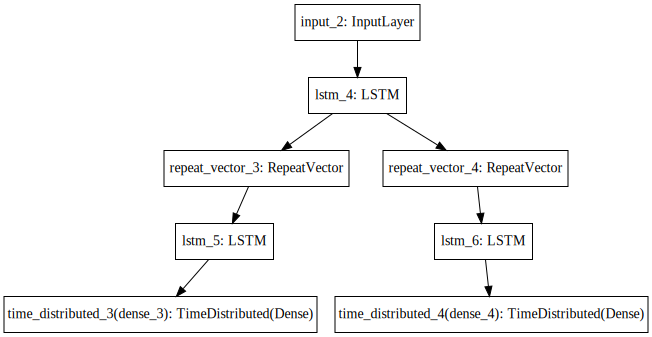

In [27]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model).create(prog='dot', format='svg'))